In [1]:
# Source: https://www.kaggle.com/code/gsdeepakkumar/car-auctions-what-influences-the-selling-price/notebook

# Import needed libraries
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import datetime as dt
import sklearn as sk
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
plt.style.use("fivethirtyeight")

In [2]:
df = pd.read_csv("datasets/car_prices.csv", error_bad_lines=False, warn_bad_lines=False)
df

C:\Users\andre\AppData\Local\Temp\ipykernel_24200\1556090130.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("datasets/car_prices.csv", error_bad_lines=False, warn_bad_lines=False)
C:\Users\andre\AppData\Local\Temp\ipykernel_24200\1556090130.py:1: FutureWarning: The warn_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv("datasets/car_prices.csv", error_bad_lines=False, warn_bad_lines=False)


,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [3]:
df.shape

(558811, 16)

In [4]:
df.head()

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)


In [5]:
df.columns

Index(['year', 'make', 'model', 'trim', 'body', 'transmission', 'vin', 'state',
       'condition', 'odometer', 'color', 'interior', 'seller', 'mmr',
       'sellingprice', 'saledate'],
      dtype='object')

In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 558811 entries, 0 to 558810
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   year          558811 non-null  int64  
 1   make          548510 non-null  object 
 2   model         548412 non-null  object 
 3   trim          548160 non-null  object 
 4   body          545616 non-null  object 
 5   transmission  493458 non-null  object 
 6   vin           558811 non-null  object 
 7   state         558811 non-null  object 
 8   condition     547017 non-null  float64
 9   odometer      558717 non-null  float64
 10  color         558062 non-null  object 
 11  interior      558062 non-null  object 
 12  seller        558811 non-null  object 
 13  mmr           558811 non-null  int64  
 14  sellingprice  558811 non-null  int64  
 15  saledate      558811 non-null  object 
dtypes: float64(2), int64(3), object(11)
memory usage: 68.2+ MB


In [8]:
df = df.rename(columns={"sellingprice": "Selling Price", "saledate": "Sale Date"})

cols_rename_dict = {}
for col in df.columns:
    cols_rename_dict.update({col: str(col[0].upper() + col[1:])})
df = df.rename(columns=cols_rename_dict)

df

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,NaN,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crew Cab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [9]:
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

Year                 0
Make             10301
Model            10399
Trim             10651
Body             13195
Transmission     65353
Vin                  0
State                0
Condition        11794
Odometer            94
Color              749
Interior           749
Seller               0
Mmr                  0
Selling Price        0
Sale Date            0
dtype: int64


Year              0.000000
Make              1.843378
Model             1.860915
Trim              1.906011
Body              2.361263
Transmission     11.695010
Vin               0.000000
State             0.000000
Condition         2.110553
Odometer          0.016821
Color             0.134035
Interior          0.134035
Seller            0.000000
Mmr               0.000000
Selling Price     0.000000
Sale Date         0.000000
dtype: float64

In [10]:
df["Make"].fillna("(Unknown)", inplace=True)
df["Make"].replace("Mercedes-Benz", "M-Benz", inplace=True)
df["Make"].replace("Volkswagen", "VW", inplace=True)
df["Model"].fillna("(Unknown)", inplace=True)
df["Trim"].fillna("(Unknown)", inplace=True)
print(df["Body"].unique(), len(df["Body"].unique()))
df["Body"].fillna(df["Body"].mode()[0], inplace=True)
df["Body"].replace("G Sedan", "gsedan", inplace=True)
df["Body"].replace("g sedan", "gsedan", inplace=True)
df["Body"].replace("Crew Cab", "Crewcab", inplace=True)
df["Body"].replace("crew cab", "crewcab", inplace=True)
df["Transmission"].fillna("Manual", inplace=True)
df["Odometer"].fillna(df["Odometer"].mean(), inplace=True)
df["Condition"].fillna(df["Condition"].mode()[0], inplace=True)
df["Color"].fillna("(Unknown)", inplace=True)
df["Color"].replace("—", "(Unknown)", inplace=True)
df["Interior"].fillna(df["Interior"].mode()[0], inplace=True)

df

['SUV' 'Sedan' 'Convertible' 'Coupe' 'Wagon' 'Hatchback' 'Crew Cab'
 'G Coupe' 'G Sedan' 'Elantra Coupe' 'Genesis Coupe' 'Minivan' nan 'Van'
 'Double Cab' 'CrewMax Cab' 'Access Cab' 'King Cab' 'SuperCrew'
 'CTS Coupe' 'Extended Cab' 'E-Series Van' 'SuperCab' 'Regular Cab'
 'G Convertible' 'Koup' 'Quad Cab' 'CTS-V Coupe' 'sedan' 'G37 Convertible'
 'Club Cab' 'Xtracab' 'Q60 Convertible' 'CTS Wagon' 'convertible'
 'G37 Coupe' 'Mega Cab' 'Cab Plus 4' 'Q60 Coupe' 'Cab Plus'
 'Beetle Convertible' 'TSX Sport Wagon' 'Promaster Cargo Van'
 'GranTurismo Convertible' 'CTS-V Wagon' 'Ram Van' 'minivan' 'suv'
 'Transit Van' 'van' 'regular-cab' 'g sedan' 'g coupe' 'hatchback'
 'king cab' 'supercrew' 'g convertible' 'coupe' 'crew cab' 'wagon'
 'double cab' 'e-series van' 'regular cab' 'quad cab' 'g37 convertible'
 'supercab' 'extended cab' 'crewmax cab' 'genesis coupe' 'access cab'
 'mega cab' 'xtracab' 'beetle convertible' 'cts coupe' 'koup' 'club cab'
 'elantra coupe' 'q60 coupe' 'cts-v coupe' 'tran

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,"kia motors america, inc",20500,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,"kia motors america, inc",20800,21500,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,4.5,1331.0,gray,black,financial services remarketing (lease),31900,30000,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,4.1,14282.0,white,black,volvo na rep/world omni,27500,27750,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,4.3,2641.0,gray,black,financial services remarketing (lease),66000,67000,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,Manual,knalw4d4xf6019304,in,4.5,18255.0,silver,black,avis corporation,35300,33000,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT)
558807,2012,Ram,2500,Power Wagon,Crewcab,automatic,3c6td5et6cg112407,wa,5.0,54393.0,white,black,i -5 uhlmann rv,30200,30800,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558808,2012,BMW,X5,xDrive35d,SUV,automatic,5uxzw0c58cl668465,ca,4.8,50561.0,black,black,financial services remarketing (lease),29800,34000,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT)
558809,2015,Nissan,Altima,2.5 S,sedan,automatic,1n4al3ap0fc216050,ga,3.8,16658.0,white,black,enterprise vehicle exchange / tra / rental / t...,15100,11100,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT)


In [11]:
print(df.isnull().sum())
(df.isnull().sum() / df.shape[0]) * 100

Year             0
Make             0
Model            0
Trim             0
Body             0
Transmission     0
Vin              0
State            0
Condition        0
Odometer         0
Color            0
Interior         0
Seller           0
Mmr              0
Selling Price    0
Sale Date        0
dtype: int64


Year             0.0
Make             0.0
Model            0.0
Trim             0.0
Body             0.0
Transmission     0.0
Vin              0.0
State            0.0
Condition        0.0
Odometer         0.0
Color            0.0
Interior         0.0
Seller           0.0
Mmr              0.0
Selling Price    0.0
Sale Date        0.0
dtype: float64

In [12]:
df["Year"] = df["Year"].apply(int)
df["State"] = df["State"].map(lambda x: x.upper())

def capitalize_first_letter(entry: str):
    if entry == "M-Benz" or entry == "VW" or entry == "BMW":
        return entry
    if entry[0] == "(":
        return entry[:2].upper() + entry[2:].lower()
    else:
        return entry[0].upper() + entry[1:].lower()

df["Make"] = df["Make"].apply(capitalize_first_letter)
df["Model"] = df["Model"].apply(capitalize_first_letter)
df["Body"] = df["Body"].apply(capitalize_first_letter)
df["Transmission"] = df["Transmission"].apply(capitalize_first_letter)
df["Color"] = df["Color"].apply(capitalize_first_letter)
df["Interior"] = df["Interior"].apply(capitalize_first_letter)

def capitalize_first_letter_for_phrase(phrase: str):
    phrase_list: list = phrase.split()
    phrase_list = [capitalize_first_letter(entry) for entry in phrase_list]
    return " ".join(phrase_list)

df["Seller"] = [capitalize_first_letter_for_phrase(entry) for entry in df["Seller"]]

def str_to_datetime(date_str: str):
    month_dict = {"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "Jun": 6, 
            "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12}
    time_str_split = tuple(str(date_str).split())
    month, day, year = month_dict[time_str_split[1]], int(time_str_split[2]), int(time_str_split[3])
    smaller_time_str_split = tuple(str(time_str_split[4]).split(":"))
    hours, minutes, seconds = int(smaller_time_str_split[0]), int(smaller_time_str_split[1]), int(smaller_time_str_split[2])
    
    return dt.datetime(year, month, day, hours, minutes, seconds)

df["Sale Date"] = df["Sale Date"].apply(str_to_datetime)

df

,Year,Make,Model,Trim,Body,Transmission,Vin,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
0,2015,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg566472,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
1,2015,Kia,Sorento,LX,Suv,Automatic,5xyktca69fg561319,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
2,2014,BMW,3 series,328i SULEV,Sedan,Automatic,wba3c1c51ek116351,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
3,2015,Volvo,S60,T5,Sedan,Automatic,yv1612tb4f1310987,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
4,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,wba6b2c57ed129731,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558806,2015,Kia,K900,Luxury,Sedan,Manual,knalw4d4xf6019304,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
558807,2012,Ram,2500,Power Wagon,Crewcab,Automatic,3c6td5et6cg112407,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
558808,2012,BMW,X5,xDrive35d,Suv,Automatic,5uxzw0c58cl668465,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00
558809,2015,Nissan,Altima,2.5 S,Sedan,Automatic,1n4al3ap0fc216050,GA,3.8,16658.0,White,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15100,11100,2015-07-09 06:45:00


In [13]:
df.index = df.pop("Vin")
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,Automatic,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crewcab,Automatic,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


In [14]:
df = df.drop(labels=df[df["Year"] < 2005].index, axis=0)
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
yv1612tb4f1310987,2015,Volvo,S60,T5,Sedan,Automatic,CA,4.1,14282.0,White,Black,Volvo Na Rep/world Omni,27500,27750,2015-01-29 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
3c6td5et6cg112407,2012,Ram,2500,Power Wagon,Crewcab,Automatic,WA,5.0,54393.0,White,Black,I -5 Uhlmann Rv,30200,30800,2015-07-08 09:30:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


In [15]:
make_counts = df["Make"].value_counts()
df = df[~df["Make"].isin(make_counts[make_counts < 10000].index)]

body_counts = df["Body"].value_counts()
df = df[~df["Body"].isin(body_counts[body_counts < 5000].index)]

color_counts = df["Color"].value_counts()
df = df[~df["Color"].isin(color_counts[color_counts < 5000].index)]

interior_counts = df["Interior"].value_counts()
df = df[~df["Interior"].isin(interior_counts[interior_counts < 1000].index)]

state_counts = df["State"].value_counts()
df = df[~df["State"].isin(state_counts[state_counts < 1000].index)]

df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,Mmr,Selling Price,Sale Date
Vin,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,Brown,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00


In [16]:
df = df.rename(columns={"Mmr": "MMR"})
df["ROI"] = df["Selling Price"] - df["MMR"]
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date,ROI
Vin,,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00,1000
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00,700
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00,-1900
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00,1000
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00,-4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,Brown,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00,2500
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00,-2300
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00,4200


In [17]:
def create_bar_graphs(attribute: str):
    sns.countplot(x=attribute, data=df)
    plt.rcParams["font.size"] = 7
    # plt.tight_layout()
    plt.show()
    print("\n")

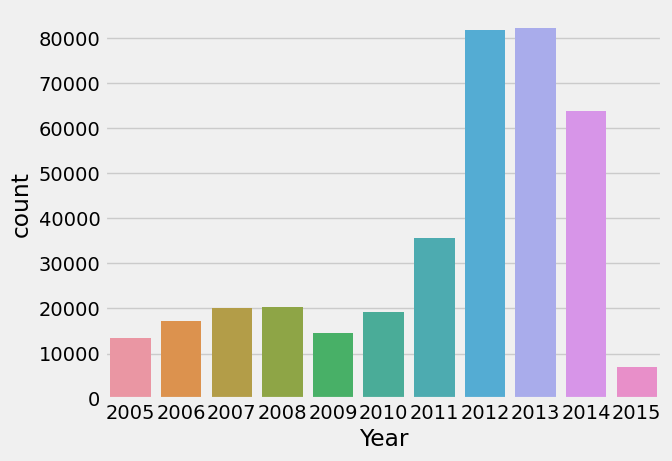

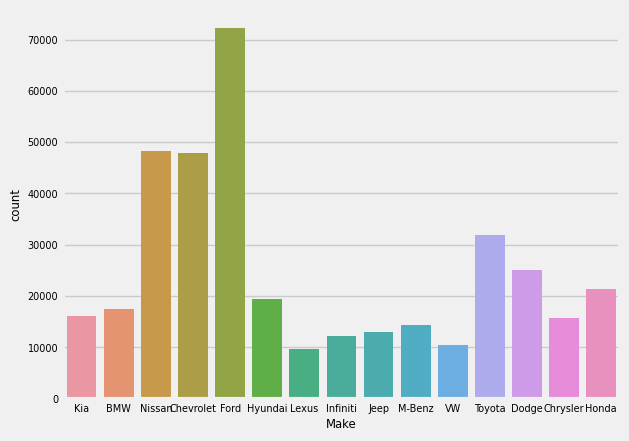

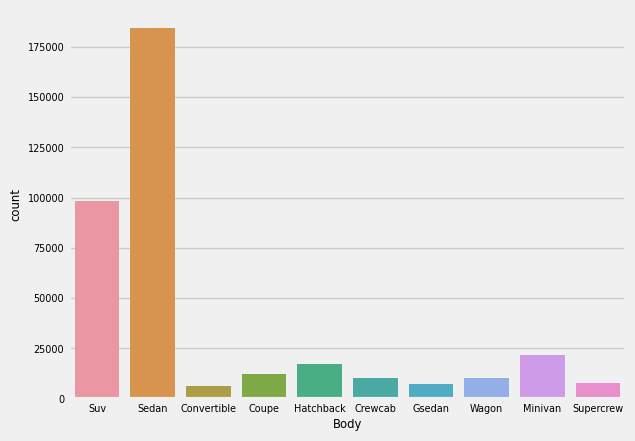

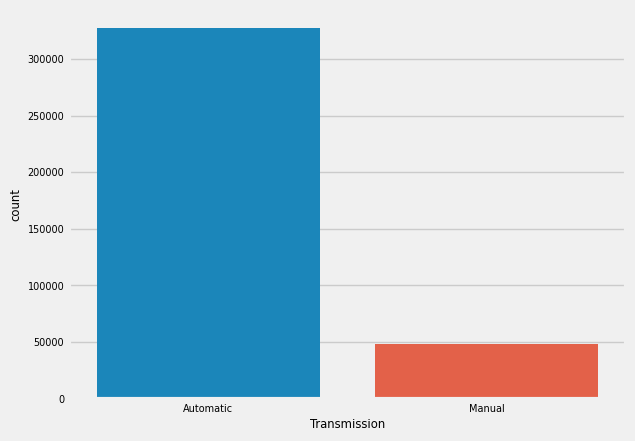

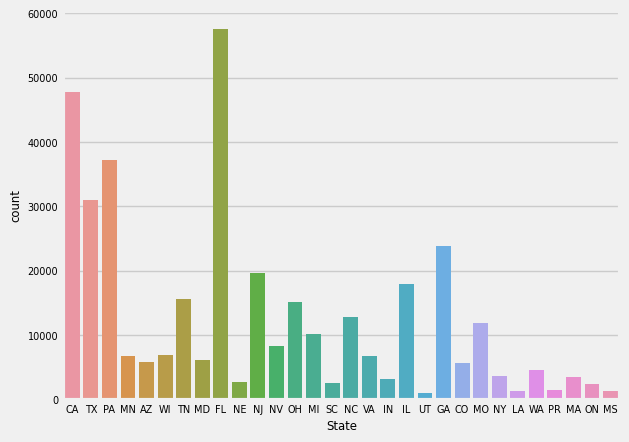

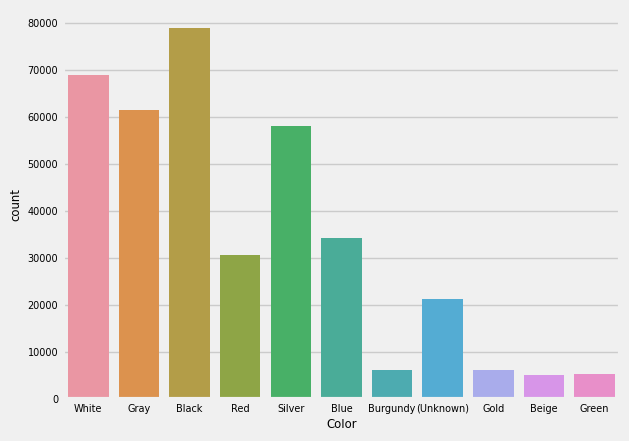

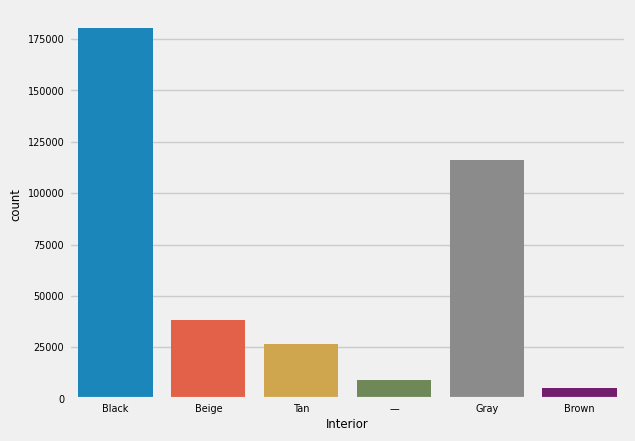

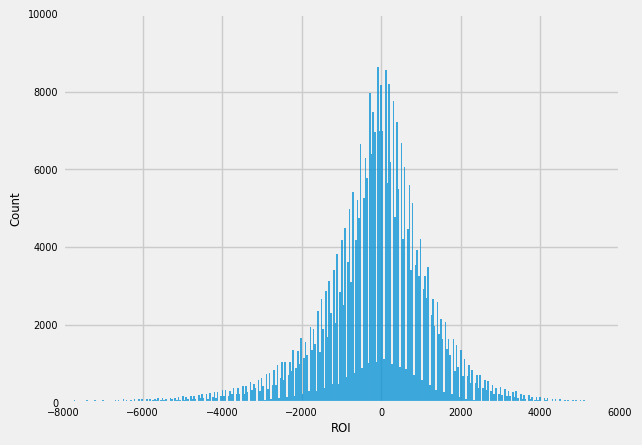

In [18]:
categorical_columns = ["Year", "Make", "Body", "Transmission", "State", "Color", "Interior"]

for col in categorical_columns:
    create_bar_graphs(col)

sns.histplot(df["ROI"])
plt.rcParams["font.size"] = 7
# plt.tight_layout()
plt.xlim(-8000, 6000)
plt.ylim(0, 10000)
plt.show()

In [19]:
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Color,Interior,Seller,MMR,Selling Price,Sale Date,ROI
Vin,,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,Black,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00,1000
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,Beige,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00,700
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,Black,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00,-1900
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,Black,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00,1000
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,Black,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00,-4450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,Brown,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00,2500
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,Black,Avis Corporation,35300,33000,2015-07-09 07:00:00,-2300
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,Black,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00,4200


In [20]:
df["ROI"] = ((df["Selling Price"] - df["MMR"]) > 0)
df = df.rename(columns={"Color": "Exterior Color", "Interior": "Matching Colors for Car Exterior and Interior"})
df["Matching Colors for Car Exterior and Interior"] = (df["Matching Colors for Car Exterior and Interior"] == df["Exterior Color"])
df

,Year,Make,Model,Trim,Body,Transmission,State,Condition,Odometer,Exterior Color,Matching Colors for Car Exterior and Interior,Seller,MMR,Selling Price,Sale Date,ROI
Vin,,,,,,,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,16639.0,White,False,"Kia Motors America, Inc",20500,21500,2014-12-16 12:30:00,True
5xyktca69fg561319,2015,Kia,Sorento,LX,Suv,Automatic,CA,5.0,9393.0,White,False,"Kia Motors America, Inc",20800,21500,2014-12-16 12:30:00,True
wba3c1c51ek116351,2014,BMW,3 series,328i SULEV,Sedan,Automatic,CA,4.5,1331.0,Gray,False,Financial Services Remarketing (Lease),31900,30000,2015-01-15 04:30:00,False
wba6b2c57ed129731,2014,BMW,6 series gran coupe,650i,Sedan,Automatic,CA,4.3,2641.0,Gray,False,Financial Services Remarketing (Lease),66000,67000,2014-12-18 12:30:00,True
1n4al3ap1fn326013,2015,Nissan,Altima,2.5 S,Sedan,Automatic,CA,1.0,5554.0,Gray,False,Enterprise Vehicle Exchange / Tra / Rental / T...,15350,10900,2014-12-30 12:00:00,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,5 series,528i,Sedan,Automatic,FL,3.9,66403.0,White,False,Lauderdale Imports Ltd Bmw Pembrok Pines,20300,22800,2015-07-07 06:15:00,True
knalw4d4xf6019304,2015,Kia,K900,Luxury,Sedan,Manual,IN,4.5,18255.0,Silver,False,Avis Corporation,35300,33000,2015-07-09 07:00:00,False
5uxzw0c58cl668465,2012,BMW,X5,xDrive35d,Suv,Automatic,CA,4.8,50561.0,Black,True,Financial Services Remarketing (Lease),29800,34000,2015-07-08 09:30:00,True


In [21]:
df.drop(["Seller", "MMR", "Selling Price", "Trim", "State", "Model"], axis=1, inplace=True)
df

,Year,Make,Body,Transmission,Condition,Odometer,Exterior Color,Matching Colors for Car Exterior and Interior,Sale Date,ROI
Vin,,,,,,,,,,
5xyktca69fg566472,2015,Kia,Suv,Automatic,5.0,16639.0,White,False,2014-12-16 12:30:00,True
5xyktca69fg561319,2015,Kia,Suv,Automatic,5.0,9393.0,White,False,2014-12-16 12:30:00,True
wba3c1c51ek116351,2014,BMW,Sedan,Automatic,4.5,1331.0,Gray,False,2015-01-15 04:30:00,False
wba6b2c57ed129731,2014,BMW,Sedan,Automatic,4.3,2641.0,Gray,False,2014-12-18 12:30:00,True
1n4al3ap1fn326013,2015,Nissan,Sedan,Automatic,1.0,5554.0,Gray,False,2014-12-30 12:00:00,False
...,...,...,...,...,...,...,...,...,...,...
wbafr1c53bc744672,2011,BMW,Sedan,Automatic,3.9,66403.0,White,False,2015-07-07 06:15:00,True
knalw4d4xf6019304,2015,Kia,Sedan,Manual,4.5,18255.0,Silver,False,2015-07-09 07:00:00,False
5uxzw0c58cl668465,2012,BMW,Suv,Automatic,4.8,50561.0,Black,True,2015-07-08 09:30:00,True


In [22]:
df.sort_values(by=["Sale Date", "Condition", "Year", "Make", "ROI", "Odometer"], ascending=[False, False, False, True, False, False], inplace=True)
df

,Year,Make,Body,Transmission,Condition,Odometer,Exterior Color,Matching Colors for Car Exterior and Interior,Sale Date,ROI
Vin,,,,,,,,,,
1gnfc13007r166874,2007,Chevrolet,Suv,Automatic,2.3,1.0,White,False,2015-07-21 02:30:00,False
3gcukrec4eg454516,2014,Chevrolet,Crewcab,Manual,4.9,26294.0,Red,False,2015-07-14 06:30:00,False
1ftfw1ef0dfb68283,2013,Ford,Supercrew,Automatic,4.4,47046.0,White,False,2015-07-14 06:30:00,False
1gc1kxcg1cf125803,2012,Chevrolet,Crewcab,Automatic,4.4,89312.0,Red,False,2015-07-14 06:30:00,True
1ftfw1ef6dkf58506,2013,Ford,Supercrew,Automatic,4.1,52992.0,White,False,2015-07-14 06:30:00,False
...,...,...,...,...,...,...,...,...,...,...
kmhfc46f26a137010,2006,Hyundai,Sedan,Automatic,2.7,130948.0,White,False,2014-01-01 09:15:00,False
1g1pg5sc0c7199389,2012,Chevrolet,Sedan,Automatic,2.5,50457.0,White,False,2014-01-01 09:15:00,False
3gnec12z96g177687,2006,Chevrolet,Crewcab,Automatic,2.1,99247.0,Black,False,2014-01-01 09:15:00,False


In [23]:
df.drop(["Sale Date"], axis=1, inplace=True)
df

,Year,Make,Body,Transmission,Condition,Odometer,Exterior Color,Matching Colors for Car Exterior and Interior,ROI
Vin,,,,,,,,,
1gnfc13007r166874,2007,Chevrolet,Suv,Automatic,2.3,1.0,White,False,False
3gcukrec4eg454516,2014,Chevrolet,Crewcab,Manual,4.9,26294.0,Red,False,False
1ftfw1ef0dfb68283,2013,Ford,Supercrew,Automatic,4.4,47046.0,White,False,False
1gc1kxcg1cf125803,2012,Chevrolet,Crewcab,Automatic,4.4,89312.0,Red,False,True
1ftfw1ef6dkf58506,2013,Ford,Supercrew,Automatic,4.1,52992.0,White,False,False
...,...,...,...,...,...,...,...,...,...
kmhfc46f26a137010,2006,Hyundai,Sedan,Automatic,2.7,130948.0,White,False,False
1g1pg5sc0c7199389,2012,Chevrolet,Sedan,Automatic,2.5,50457.0,White,False,False
3gnec12z96g177687,2006,Chevrolet,Crewcab,Automatic,2.1,99247.0,Black,False,False


In [24]:
df["Transmission"] = df["Transmission"].map({"Automatic": 0, "Manual": 1}).astype(int)
df["ROI"] = df["ROI"].map({True: 1, False: 0}).astype(int)
df["Matching Colors for Car Exterior and Interior"] = df["Matching Colors for Car Exterior and Interior"].map({True: 1, False: 0}).astype(int)
df["Exterior Color"] = df["Exterior Color"].map({"Black": 0, "White": 1, "Gray": 2, "Silver": 3, "Blue": 4, "Red": 5, "Gold": 6, "Burgundy": 7, "Beige": 8, "Green": 9, "(Unknown)": 10}).astype(int)
df["Make"] = df["Make"].map({"Ford": 0, "Nissan": 1, "Chevrolet": 2, "Toyota": 3, "Dodge": 4, "Honda": 5, "Hyundai": 6, "BMW": 7, "Kia": 8, "Chrysler": 9, "M-Benz": 10, "Jeep": 11, "Infiniti": 12, 
    "VW": 13, "Lexus": 14}).astype(int)
df["Body"] = df["Body"].map({"Sedan": 0, "Suv": 1, "Minivan": 2, "Hatchback": 3, "Coupe": 4, "Crewcab": 5, "Wagon": 6, "Supercrew": 7, "Convertible": 8, "Gsedan": 9}).astype(int)
df

,Year,Make,Body,Transmission,Condition,Odometer,Exterior Color,Matching Colors for Car Exterior and Interior,ROI
Vin,,,,,,,,,
1gnfc13007r166874,2007,2,1,0,2.3,1.0,1,0,0
3gcukrec4eg454516,2014,2,5,1,4.9,26294.0,5,0,0
1ftfw1ef0dfb68283,2013,0,7,0,4.4,47046.0,1,0,0
1gc1kxcg1cf125803,2012,2,5,0,4.4,89312.0,5,0,1
1ftfw1ef6dkf58506,2013,0,7,0,4.1,52992.0,1,0,0
...,...,...,...,...,...,...,...,...,...
kmhfc46f26a137010,2006,6,0,0,2.7,130948.0,1,0,0
1g1pg5sc0c7199389,2012,2,0,0,2.5,50457.0,1,0,0
3gnec12z96g177687,2006,2,5,0,2.1,99247.0,0,0,0


<Axes: >

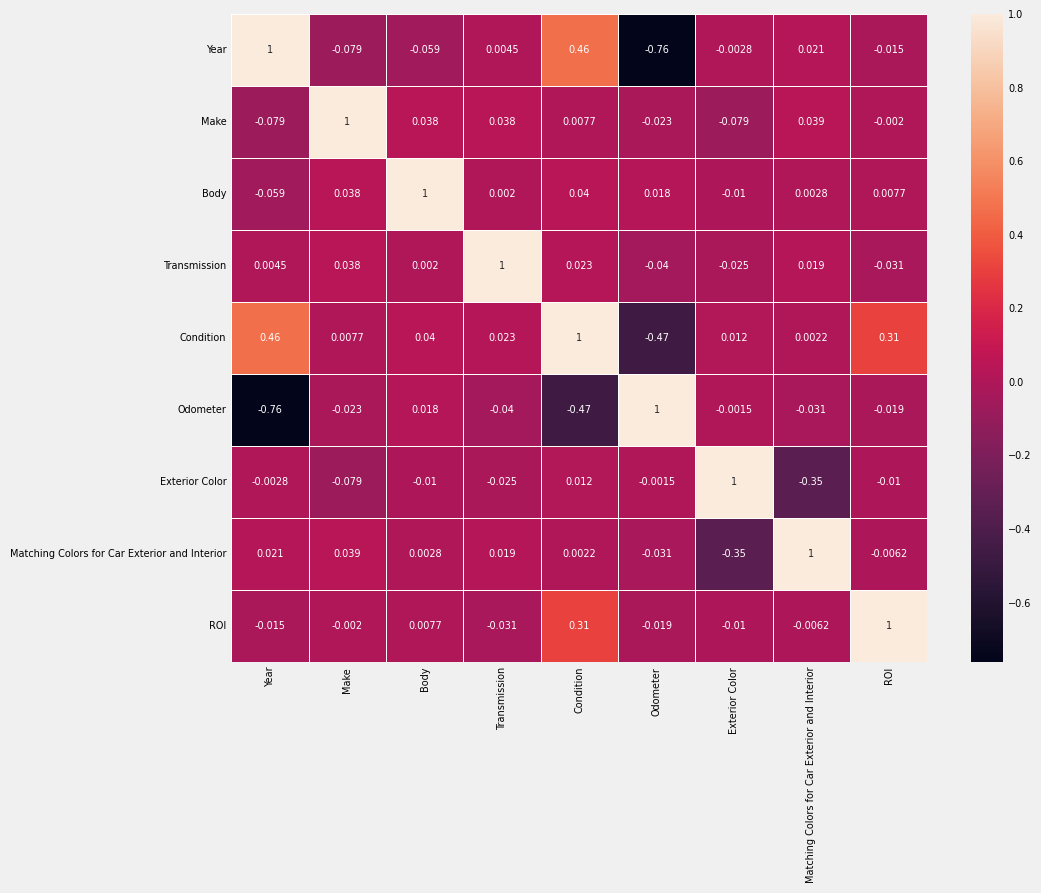

In [25]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, linewidths=0.5)

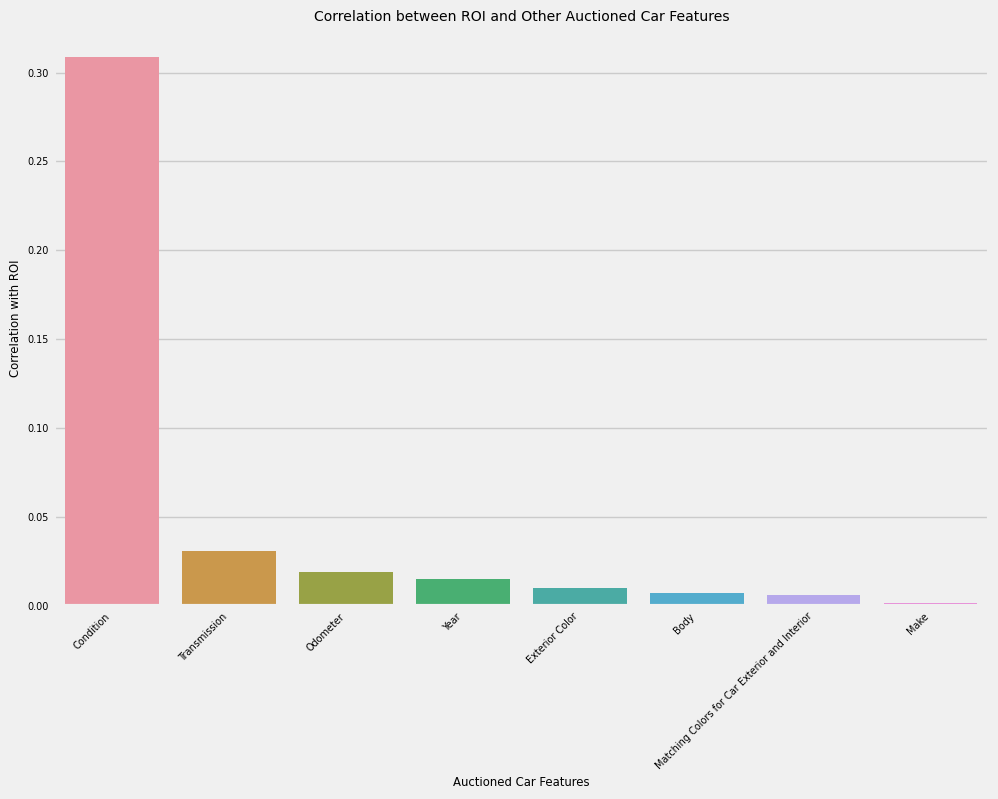

In [26]:
target_corr = df.corr()["ROI"].abs().sort_values(ascending=False)
plt.figure(figsize=(10, 8))
sns.barplot(x=target_corr.index[1:], y=target_corr.values[1:])
plt.xticks(rotation=45, ha="right")
plt.xlabel("Auctioned Car Features")
plt.ylabel("Correlation with ROI")
plt.title("Correlation between ROI and Other Auctioned Car Features")
plt.tight_layout()
plt.show()

In [27]:
X = df.drop(["ROI"], axis=1)
y = df["ROI"]

print("X Shape: " + str(X.shape))
print("Y Shape: " + str(y.shape))

pipeline = Pipeline([
    ("min_max_scaler", MinMaxScaler()),
    ("std_scaler", StandardScaler())
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=True, random_state=1)
X_train_copy = X_train.copy()
X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)

X Shape: (375113, 8)
Y Shape: (375113,)


In [28]:
# Source: https://www.kaggle.com/code/aliessamali/titanic-supervised-learning-classification

def print_score(clf, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True, zero_division=0))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_train, y_train_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_train, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True, zero_division=0))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"ROC AUC Score: {roc_auc_score(y_test, y_test_prob) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")
        plt.figure(figsize=(10, 8))
        sns.heatmap(confusion_matrix(y_test, pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title('Confusion Matrix')
        plt.show()

Train Result:
Accuracy Score: 64.88%
_______________________________________________
ROC AUC Score: 70.70%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.669965       0.624459  0.648752       0.647212   
recall          0.671381       0.622954  0.648752       0.647168   
f1-score        0.670672       0.623706  0.648752       0.647189   
support    159863.000000  140227.000000  0.648752  300090.000000   

            weighted avg  
precision       0.648701  
recall          0.648752  
f1-score        0.648726  
support    300090.000000  
_______________________________________________
Confusion Matrix: 
 [[107329  52534]
 [ 52872  87355]]



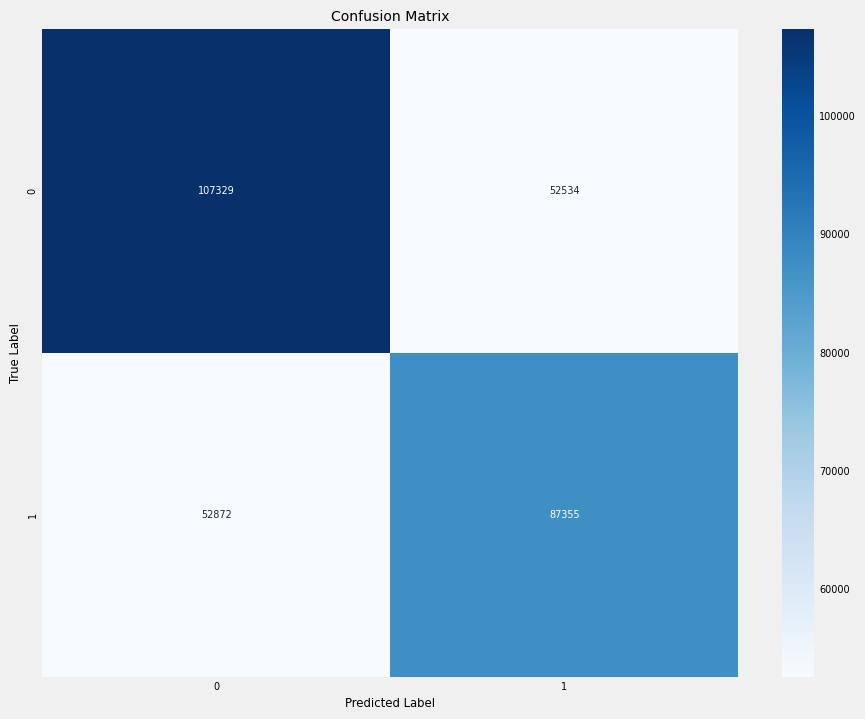

Test Result:
Accuracy Score: 64.44%
_______________________________________________
ROC AUC Score: 70.35%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.666450      0.619177  0.644376      0.642813      0.644377
recall         0.666417      0.619212  0.644376      0.642814      0.644376
f1-score       0.666433      0.619194  0.644376      0.642814      0.644376
support    39993.000000  35030.000000  0.644376  75023.000000  75023.000000
_______________________________________________
Confusion Matrix: 
 [[26652 13341]
 [13339 21691]]



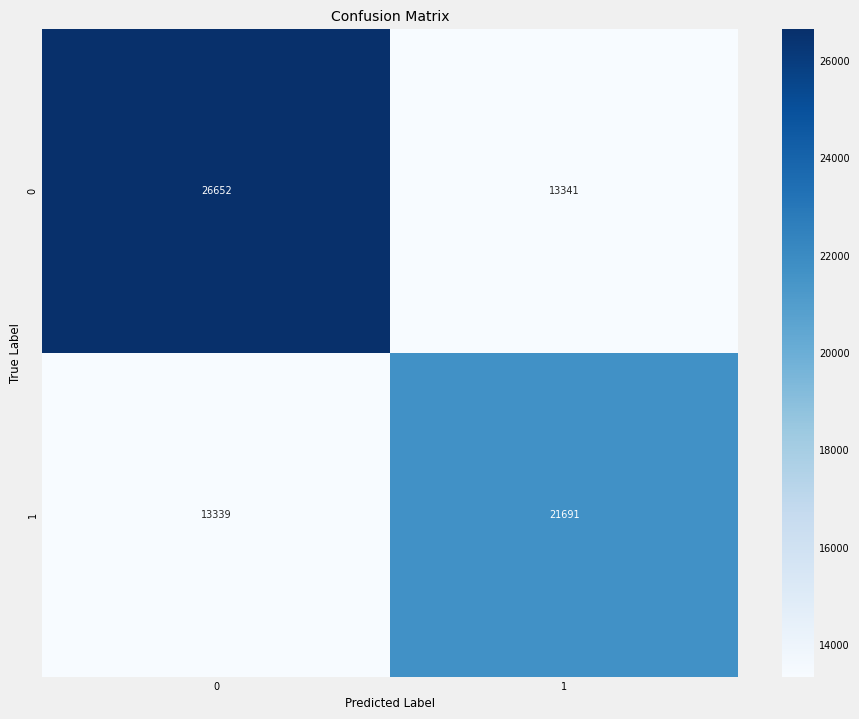

In [29]:
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_train_prob = log_reg.predict_proba(X_train)[:, 1]
y_test_prob = log_reg.predict_proba(X_test)[:, 1]

print_score(log_reg, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(log_reg, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

Train Result:
Accuracy Score: 74.77%
_______________________________________________
ROC AUC Score: 82.71%
_______________________________________________
CLASSIFICATION REPORT:
                       0              1  accuracy      macro avg  \
precision       0.761243       0.731942  0.747666       0.746592   
recall          0.766838       0.725809  0.747666       0.746323   
f1-score        0.764030       0.728863  0.747666       0.746446   
support    159863.000000  140227.000000  0.747666  300090.000000   

            weighted avg  
precision       0.747551  
recall          0.747666  
f1-score        0.747597  
support    300090.000000  
_______________________________________________
Confusion Matrix: 
 [[122589  37274]
 [ 38449 101778]]



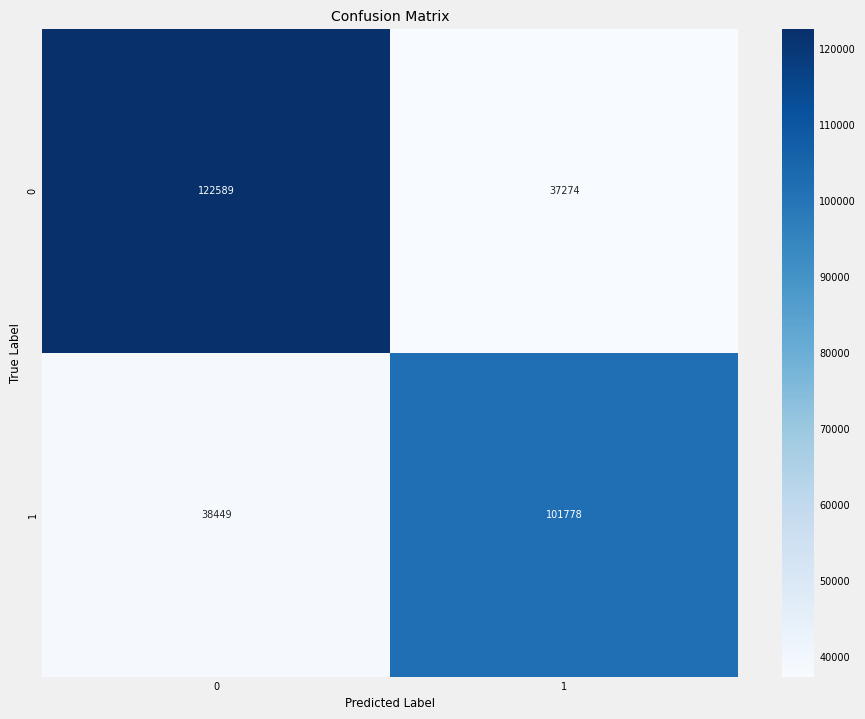

Test Result:
Accuracy Score: 61.93%
_______________________________________________
ROC AUC Score: 65.97%
_______________________________________________
CLASSIFICATION REPORT:
                      0             1  accuracy     macro avg  weighted avg
precision      0.642210      0.592868  0.619303      0.617539      0.619171
recall         0.645438      0.589466  0.619303      0.617452      0.619303
f1-score       0.643820      0.591162  0.619303      0.617491      0.619233
support    39993.000000  35030.000000  0.619303  75023.000000  75023.000000
_______________________________________________
Confusion Matrix: 
 [[25813 14180]
 [14381 20649]]



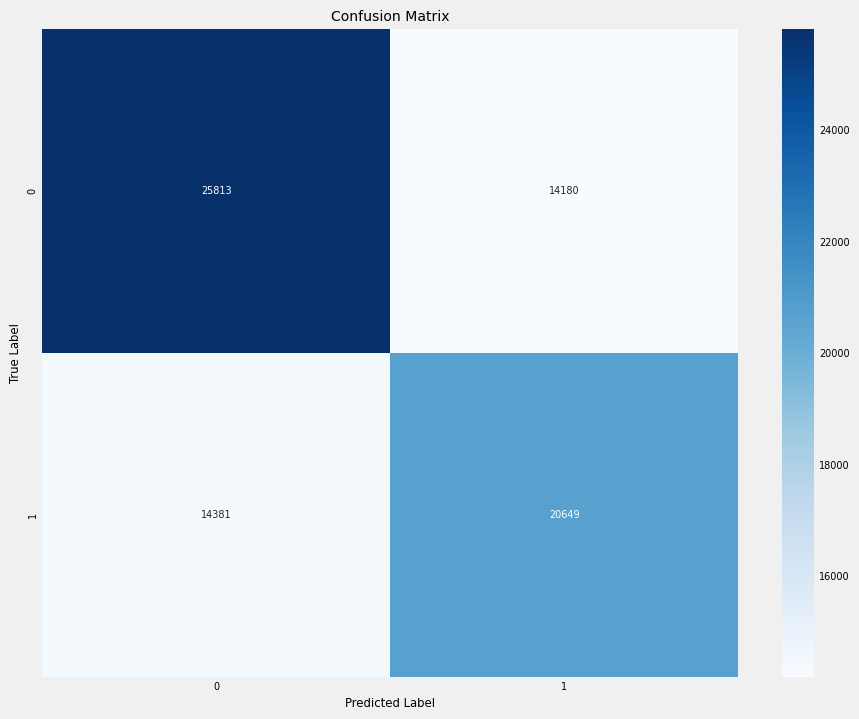

In [30]:
knn_classifier = KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
y_train_prob = knn_classifier.predict_proba(X_train)[:, 1]
y_test_prob = knn_classifier.predict_proba(X_test)[:, 1]

print_score(knn_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(knn_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

In [31]:
rf_classifier = RandomForestClassifier(n_estimators= 100, random_state=42)
rf_classifier.fit(X_train, y_train)
print(list(X_train))
print(list(y_train))
y_train_prob = rf_classifier.predict_proba(X_train)[:, 1]
y_test_prob = rf_classifier.predict_proba(X_test)[:, 1]

print_score(rf_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(rf_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

In [ ]:
# Source: https://www.kaggle.com/code/prashant111/random-forest-classifier-tutorial
rf_visualization = pd.Series(rf_classifier.feature_importances_, index=df.columns.tolist()[1:]).sort_values(ascending=False)
sns.barplot(x=rf_visualization, y=rf_visualization.index)

plt.xlabel("Feature Importance Score")
plt.yticks(rotation=45, ha="right")
plt.ylabel("Features")
plt.title("Visualizing Important Features")
plt.show()

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_classifier.fit(X_train, y_train)
y_train_prob = dt_classifier.predict_proba(X_train)[:, 1]
y_test_prob = dt_classifier.predict_proba(X_test)[:, 1]

print_score(dt_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=True)
print_score(dt_classifier, X_train, y_train, X_test, y_test, y_train_prob, y_test_prob, train=False)

In [ ]:
plt.figure(figsize=(10, 8))
sk.tree.plot_tree(dt_classifier, feature_names=df.columns.tolist()[1:], filled=True, class_names=["Negative ROI - Loss Money", "Positive ROI - Gain Money / Profited"])
plt.show()